Cross-Borehole example
======================
In this example we are going to invert one of the example given in the R2 manual. The aim is to detect a hidden block
in the bottom left of the picture as shown below:
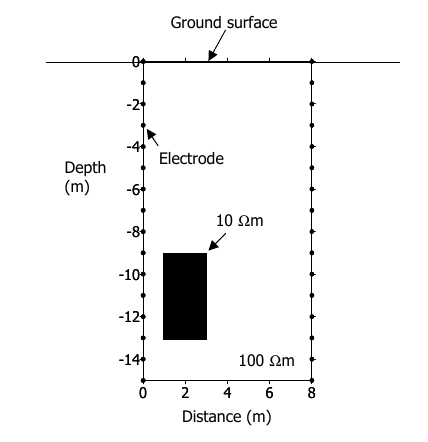
and this pictures:

![Xhb.png](./img/Xbh.png)

kjlkjlm
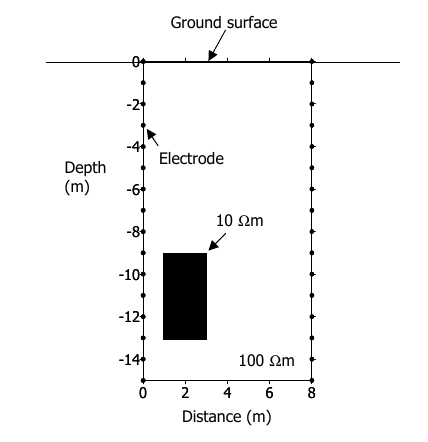

First let's import pyR2 stuff:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np # just for parsing the electrode position file
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

from resipy.R2 import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/resipy
ResIPy version =  1.1.5


Then we will import the `protocol.dat` file that was outputed by the forward model with this geometry and invert it. Note what we also need to import the electrodes position from a .csv file with 3 columns:x, y, buried. The `buried` column contains 1 if the electrode is buried and 0 if not.

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 407 quadrupoles removed.
strange quadrupoles: filterData: 0 / 407 quadrupoles removed.
407/407 reciprocal measurements NOT found.
0 measurements error > 20 %
computed DOI : -20.33
trian
Generating gmsh input file...

doi in gmshWrap.py: -20.333333
adding surface points and electrodes to input file...
probing for boundaries and other additions to the mesh
buried electrodes added to input file
0 polygons added to input file
0 boundary(ies) added to input file
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir

parsing gmsh mesh...

importing node coordinates...
reading connection matrix
ignoring 0 non-triangle elements in the mesh file, as they are not required for R2
0 element node orderings had to be corrected becuase they were found to be orientated clockwise

written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/i

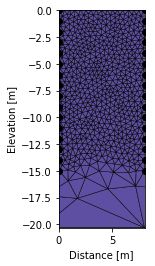

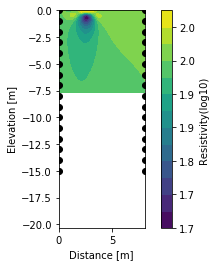

In [2]:
k = R2()
k.createSurvey('../src/resipy/test/protocolXbh.dat', ftype='forwardProtocolDC')
x = np.genfromtxt('../src/resipy/test/elecXbh.csv', delimiter=',')
k.elec[:,[0,2]] = x[:,:2]
buried = x[:,2].astype(bool)
k.createMesh('trian', buried=buried, cl=0.5, cl_factor=20, show_output=False)
# cl is characteristic length, it defines the resolution of the mesh around the electrodes, the smaller, the finer
# cl_factor is how the mesh will grow away from the electrode
# NOTE that a too fine mesh (very small cl) will takes a lot of RAM
# but a too coarse mesh won't be able to resolve the target
k.showMesh()
k.invert()
k.showResults(sens=False, contour=True)